In [1]:
import numpy as np
from matplotlib import pyplot as plt

import torchgp
from utils import get_data, plot_result

In [2]:
x_train, y_train, x_test, _ = get_data()

In [3]:
init_output_scale = 1.0
init_input_scale = 0.8
init_noise_variance = 0.001
num_pseudo = 10

In [4]:
x_pseudo = np.linspace(x_test.min(), x_test.max(), num_pseudo).reshape(-1, 1)
kernel = torchgp.kernels.GaussianKernel(input_scale=init_input_scale, output_scale=init_output_scale)
model = torchgp.models.SGPRModel(x_pseudo, kernel, noise_variance=init_noise_variance)

In [5]:
model.add_data(x_train, y_train)

## Prediction Before Learning

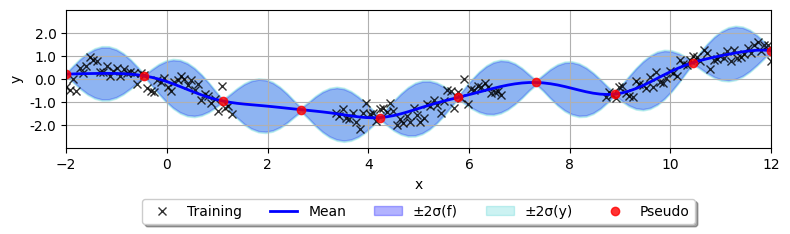

In [6]:
mean, var = model.predict(x_test, include_likelihood=False)
fig, ax = plt.subplots(figsize=(8, 3))
plot_result(
    ax,
    x_train,
    y_train,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.6),
    fancybox=True,
    shadow=True,
    ncol=6,
)
ax.grid()
ax.set_xlabel("x")
fig.tight_layout()
plt.show()

## Prediction After Learning

In [7]:
model.learn()

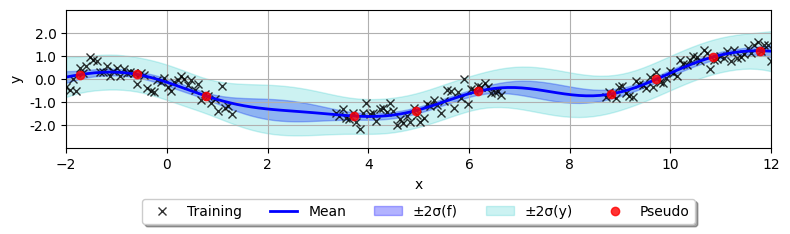

In [8]:
mean, var = model.predict(x_test, include_likelihood=False)
fig, ax = plt.subplots(figsize=(8, 3))
plot_result(
    ax,
    x_train,
    y_train,
    x_test,
    mean,
    var,
    model.likelihood.noise_variance.item(),
    model.x_pseudo,
    model.f_pseudo,
)
ax.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.6),
    fancybox=True,
    shadow=True,
    ncol=6,
)
ax.grid()
ax.set_xlabel("x")
fig.tight_layout()
plt.show()